<a href="https://colab.research.google.com/github/takatoshiinaoka/google_colaboratory/blob/main/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E5%A7%8B%E3%82%81%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [ゼロから始める機械学習 #1](https://qiita.com/t-baba-11/items/054bda7060952fc6bf74)
- [ゼロから始める機械学習 #2](https://qiita.com/t-baba-11/items/6dc947e3f3b33485ccf6)

----
## Google Driveと接続

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## モジュールのインポート


In [5]:
import pandas as pd
import seaborn as sns

## データの読み込み

In [6]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/data/train/n10degC_Cycle_1_Pan18650PF.csv")
df = raw_dataset.copy()
print(df)

                   TimeStamp  Voltage  Current       Ah  Wh     Power  \
0      6/10/2017 11:25:41 AM  4.10596 -1.80146 -0.00005 NaN -7.396723   
1      6/10/2017 11:25:41 AM  4.01524 -1.84964 -0.00010 NaN -7.426749   
2      6/10/2017 11:25:41 AM  3.95799 -1.88639 -0.00015 NaN -7.466313   
3      6/10/2017 11:25:41 AM  3.90973 -1.91824 -0.00021 NaN -7.499800   
4      6/10/2017 11:25:41 AM  3.86920 -1.94519 -0.00026 NaN -7.526329   
...                      ...      ...      ...      ...  ..       ...   
57229   6/10/2017 1:01:15 PM  3.13705 -0.34625 -2.02998 NaN -1.086204   
57230   6/10/2017 1:01:15 PM  3.14863 -0.34380 -2.02999 NaN -1.082499   
57231   6/10/2017 1:01:15 PM  3.15828 -0.34298 -2.03000 NaN -1.083227   
57232   6/10/2017 1:01:16 PM  3.16536 -0.34135 -2.03001 NaN -1.080496   
57233   6/10/2017 1:01:16 PM  3.18479  0.00000 -2.03001 NaN  0.000000   

       Battery_Temp_degC         Time  Chamber_Temp_degC        SOC  \
0             -10.158136     0.000000               

## データを確認する

In [7]:
df.head()

,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC,SOC,Drive Cycle
0,6/10/2017 11:25:41 AM,4.10596,-1.80146,-0.00005,NaN,-7.396723,-10.158136,0.000000,-10,99.998276,Cycle_1
1,6/10/2017 11:25:41 AM,4.01524,-1.84964,-0.00010,NaN,-7.426749,-10.158136,0.102001,-10,99.996552,Cycle_1
2,6/10/2017 11:25:41 AM,3.95799,-1.88639,-0.00015,NaN,-7.466313,-10.158136,0.197002,-10,99.994828,Cycle_1
3,6/10/2017 11:25:41 AM,3.90973,-1.91824,-0.00021,NaN,-7.499800,-10.158136,0.300008,-10,99.992759,Cycle_1
4,6/10/2017 11:25:41 AM,3.86920,-1.94519,-0.00026,NaN,-7.526329,-10.158136,0.398006,-10,99.991034,Cycle_1


|  カラム名 |  内容 |
|  --| -- |
| TimeStamp | 計測日時 |
| Voltage | セル端子電圧の計測値(V) |
| Current | 電流の計測値(A) |
| Ah | 計測された電流積算値(Ah) |
| Wh |  計測された消費電力値(Wh) |
| Power |  電力値(W) |
| Battery_Temp_degC | バッテリー中央部の温度(°C) |
| Time | 累積計測時間(msec) |
| Chamber_Temp_degC |hermal chamberの温度(°C) |
| SOC | 充電率（公称容量2.9Ahに対する現在の残容量）<br>※  [公称容量 - 電流積算値 / 公称容量 ]で求まる。 |
| Drive Cycle | Urban Dynamometer Driving Schedule (UDDS) <br> Highway Fuel Economy Driving Schedule (HWFET) <br> Los Angeles 92 (LA92) <br> Supplemental Federal Test Procedure Driving Schedule (US06) <br><br> Cycle_2, Cycle_2, Cycle_3, Cycle_4, NN <br> は上記のサイクルをランダムで組み合わせたもの |


## 特徴量の抽出
### ペアプロット図
相関関係をわかりやすくするため，ペアプロット図を出力．  
ここから何が分かるか考えてみる．

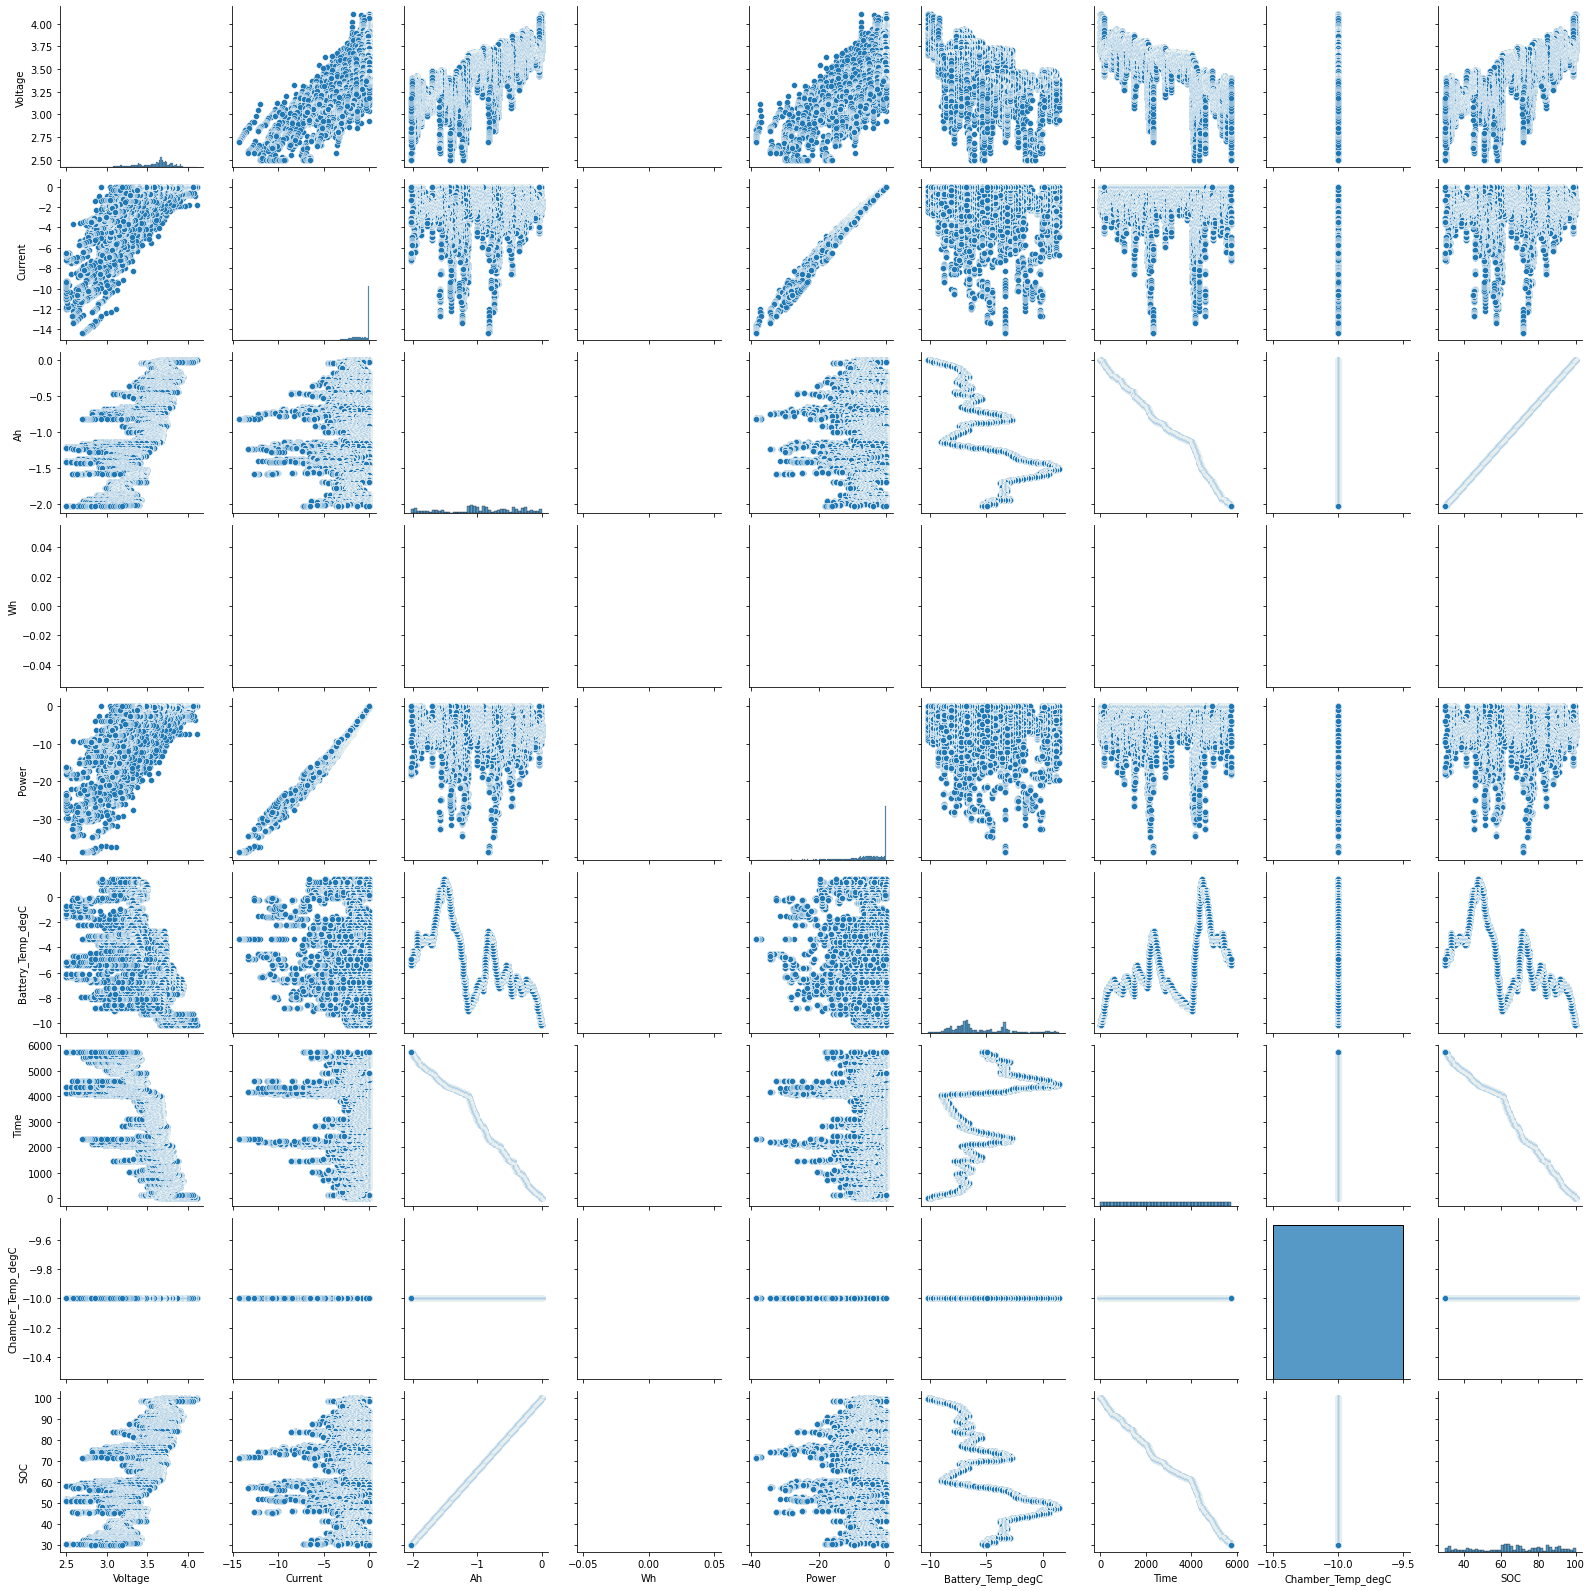

In [8]:
sns.pairplot(df)

ペアプロット図を見て，SOCと相関関係があるカラムが分かれば，その特徴の行列を作り完了．

In [9]:
select_cols = ["Voltage", "Ah", "Battery_Temp_degC", "Time"] #相関関係のあるカラムを選択
df_new = df.loc[:,select_cols] #行列を作成
df_new.head()

,Voltage,Ah,Battery_Temp_degC,Time
0,4.10596,-0.00005,-10.158136,0.000000
1,4.01524,-0.00010,-10.158136,0.102001
2,3.95799,-0.00015,-10.158136,0.197002
3,3.90973,-0.00021,-10.158136,0.300008
4,3.86920,-0.00026,-10.158136,0.398006


## 相関行列
ペアプロット図では，特徴量の数が増えすぎると確認できなくなるため，相関関係を求め，相関行列に置き換える．  
※相関関係とは，2つのデータ間の関係性を数値化したものである．  
     
各，特徴量間の相関係数を求め，ヒートマップとして，表示する．

In [10]:
corr_matrix = df.corr() #相関係数の計算(デフォルトでは，ピアソンの積率相関係数)
print(corr_matrix)

                    Voltage   Current        Ah  Wh     Power  \
Voltage            1.000000  0.677553  0.754133 NaN  0.642731   
Current            0.677553  1.000000  0.081077 NaN  0.992566   
Ah                 0.754133  0.081077  1.000000 NaN  0.033342   
Wh                      NaN       NaN       NaN NaN       NaN   
Power              0.642731  0.992566  0.033342 NaN  1.000000   
Battery_Temp_degC -0.591360 -0.213003 -0.607648 NaN -0.185718   
Time              -0.737769 -0.078480 -0.990883 NaN -0.029206   
Chamber_Temp_degC       NaN       NaN       NaN NaN       NaN   
SOC                0.754133  0.081077  1.000000 NaN  0.033342   

                   Battery_Temp_degC      Time  Chamber_Temp_degC       SOC  
Voltage                    -0.591360 -0.737769                NaN  0.754133  
Current                    -0.213003 -0.078480                NaN  0.081077  
Ah                         -0.607648 -0.990883                NaN  1.000000  
Wh                               NaN 

ヒートマップの表示．  
値が0に近いほど関係が浅く，1や-1に近いほど関係が深い．

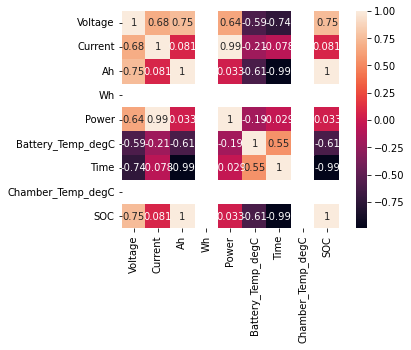

In [11]:
sns.heatmap(corr_matrix, #相関係数
            square=True, #正方形で表示
            annot=True, #数値を表示
            xticklabels=corr_matrix.columns.values, #x軸のラベル
            yticklabels=corr_matrix.columns.values #y軸のラベル
          )

## 抽出した特徴量での行列の作成
目標値であるSOCとの相関係数だけ表示する．

In [12]:
df_copy = df.copy()
df_copy = df_copy.drop(["TimeStamp","Drive Cycle"], axis=1) #数値じゃない特徴量を除去

#SOCとの相関係数のみ抽出
corr_y = pd.DataFrame({"features":df_copy.columns,"corr_SOC":corr_matrix["SOC"]},index=None) 
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_SOC
0,Voltage,0.754133
1,Current,0.081077
2,Ah,1.000000
3,Wh,nan
4,Power,0.033342
5,Battery_Temp_degC,-0.607648
6,Time,-0.990883
7,Chamber_Temp_degC,nan
8,SOC,1.000000


相関係数の値が高いものだけを選択し，
その特徴量だけの行列に置き換える．

In [14]:
select_cols = corr_y[corr_y["corr_SOC"].abs()>0.5] #相関係数の絶対値が0.5より大きいものを選択
print(select_cols)

select_cols = list(select_cols["features"])

df_new = df.loc[:,select_cols] # 選択した特徴量の行列のみ抽出
df_new.head()

            features  corr_SOC
0            Voltage  0.754133
2                 Ah  1.000000
5  Battery_Temp_degC -0.607648
6               Time -0.990883
8                SOC  1.000000


,Voltage,Ah,Battery_Temp_degC,Time,SOC
0,4.10596,-0.00005,-10.158136,0.000000,99.998276
1,4.01524,-0.00010,-10.158136,0.102001,99.996552
2,3.95799,-0.00015,-10.158136,0.197002,99.994828
3,3.90973,-0.00021,-10.158136,0.300008,99.992759
4,3.86920,-0.00026,-10.158136,0.398006,99.991034


## 実際に使う特徴量を決める
今回抽出した特徴量のAhとWhはテストデータには含まれないため，実際には使用できない．  
しかし，ほかの特徴量は，相関があまりなく，学習の性能が向上しない．  
なので，下記のチューニング編のように特徴量を自作する必要がある．  

[ゼロから始める機械学習 チューニング編 - Qiita](https://qiita.com/t-baba-11/items/34f8d2f478504a339481)